# Gaussian Mixture Model

## Start up script

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plot

DATA_PATH = "CSE575-HW03-Data.csv"

#pd.options.display.max_rows = 128
dataFrame = pd.read_csv(DATA_PATH, header=None)
data = dataFrame.to_numpy()

In [2]:
dataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,92.9894,-9.6430,-4.6412,-6.8569,-5.2263,-4.9604,2.3191,-0.4579,0.5685,1.8047,2.6274,5.2223,6.5404
1,73.4054,6.5269,-6.6736,0.5054,-4.4818,-5.1157,-6.3784,1.6296,-3.3999,0.0652,-2.5042,1.7626,-1.0612
2,94.6334,-4.5986,-12.4970,-6.3137,-6.7072,-7.4690,-6.7463,-3.6960,-3.4587,-1.4178,-1.3265,1.8756,0.6391
3,89.1135,-2.2287,0.2304,-2.7300,-0.9133,-1.9530,-1.0086,0.1486,2.0624,1.1938,-1.0113,0.1567,-1.2346
4,76.1929,2.5222,9.1796,4.3947,6.6885,4.0074,1.9488,2.2791,-0.2567,2.8208,-2.9867,-3.6861,-2.2471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,86.5598,-4.0067,0.7036,1.3357,-6.9007,0.8063,-0.4726,-0.2890,-1.3798,3.1221,-2.5924,1.8249,-6.1399
124,83.8025,-3.4814,3.5016,-0.2959,-7.0385,2.3506,-3.7101,3.5613,-1.5063,3.9646,0.3750,0.8998,-1.9977
125,79.5542,-3.4625,-1.1868,2.6972,-6.5663,2.2622,-2.6907,3.2315,-3.5141,0.4649,-3.1912,0.9381,-3.8443
126,84.3496,-2.7338,-1.3004,2.2604,-6.9315,0.1138,-3.1434,1.6895,-3.1004,2.2891,0.2254,2.0268,-1.5204


In [5]:
data.shape

(128, 13)

In [6]:
#numClusters is the number of clusters, d is the dimension of the data
numClusters = 2
d = data.shape[1]

kmeans_centers =[ [90.89453636, -3.22270152, -1.14808939, -0.9751    , -5.1320803 ,
       -2.41321061, -2.80382121, -1.19646212, -1.32201667,  0.33434242,
        0.73901515,  1.05690152,  0.75381061] , [7.60080565e+01, -1.10158710e+00,  1.08728065e+00,  2.11840323e-01,
       -3.08939677e+00, -8.95835484e-01, -1.85367097e+00,  2.11032258e-02,
       -1.51439355e+00, -2.26920968e-01,  1.49911290e-01, -4.95998387e-01,
        5.67758065e-02]]

# cluster_size is the array containing the size of every cluster produced by K-means clustering implemented in Problem 2
cluster_size = [62, 66]
#initMeans = kmeans_centers
#centers from k-means

# initMeans are the initial means for GMM, where kmeans_centers are the K means returned by K-means clustering implemented in Problem 2 of HW03.
initMeans = kmeans_centers

#initCovariances are the initial covariance matrices for GMM
initCovariances = np.zeros([d,d,numClusters])

#initPriors are initial mixing coefficients for GMM
initPriors = np.zeros(numClusters)

for k in range(numClusters):

    initPriors[k] = cluster_size[k]/data.shape[0]

    initCovariances[:,:,k] = np.identity(data.shape[1])

    print(initPriors[k])


0.484375
0.515625


## Gaussian Mixture Model Implementation

EM for Gaussian Mixtures

Goal: maximize likelihood function with respect to parameters (mean, covariances & mixing coefficients)

- Step 1: initialize mean, covariance, mixing coefficients and evaluate initial value of log likelihood
- Step 2: E step - Evaluate responsibilities using current parameter values (equation 9.23)
- Step 3: M step - Re-estimate parameters using current responsibilities
- Step 4: Evaluate log likelihood (equation 9.28)

In [23]:
from scipy.stats import multivariate_normal

def pdf(X, mean, covariance):
  return multivariate_normal.pdf(X, mean=mean, cov=covariance)

def log_likelihood(marginal_probability):
  return np.sum(np.log(marginal_probability))


In [31]:
np.set_printoptions(precision=4, suppress=True, floatmode='fixed', linewidth=100)
# Step 1: initialize mean + covariance + mixing coefficients
mean = initMeans.copy()
covariance = initCovariances.copy()
mixing_coefficient = initPriors.copy()
# Step 1: evaluate initial value of log likelihood
log_likelihoods = []

for i in range(100):

    # Step 2: E step - Evaluate responsibilities using current parameter values (equation 9.23)
    joint_probability = np.zeros([data.shape[0], numClusters])
    for k in range(numClusters):
      joint_probability[:,k] = mixing_coefficient[k] * pdf(data, mean[k], covariance[:,:,k])
    marginal_probability = np.sum(joint_probability, axis=1, keepdims=True)
    posterior_probability = joint_probability / marginal_probability

    # Step 4: Evaluate log likelihood (equation 9.28)
    current_log_likelihood = log_likelihood(marginal_probability)
    log_likelihoods.append(current_log_likelihood)

    # Terminate if log-likelihood change smaller than 1e-5
    if i > 0 and abs(current_log_likelihood - log_likelihoods[-2]) < 1e-5:
      print(f"Converged after {i} iterations.")
      break

    # Step 3: M step - Re-estimate parameters using current responsibilities
    sum_of_responsibilities = np.sum(posterior_probability, axis=0)
    for k in range(numClusters):
      # update mean
      mean[k] = np.dot(posterior_probability[:,k], data) / sum_of_responsibilities[k]
      # update covariance
      covariance[:,:,k] = np.dot(posterior_probability[:,k] * (data - mean[k]).T, data - mean[k]) / sum_of_responsibilities[k]
      # update mixing coefficient
      mixing_coefficient[k] = sum_of_responsibilities[k] / data.shape[0]

    print(f"Iteration {i+1}: log-likelihood = {current_log_likelihood}")

# cluster assignment
cluster_assignment = np.argmax(posterior_probability, axis=1)
print(f'cluster assignment: {cluster_assignment}')

Iteration 1: log-likelihood = -10362.317090988427
Iteration 2: log-likelihood = -3923.2933406522266
Iteration 3: log-likelihood = -3905.792931690521
Iteration 4: log-likelihood = -3898.757339135649
Iteration 5: log-likelihood = -3897.7705525748133
Iteration 6: log-likelihood = -3897.242361564788
Iteration 7: log-likelihood = -3896.928497177407
Iteration 8: log-likelihood = -3896.7676779248377
Iteration 9: log-likelihood = -3896.6678825277527
Iteration 10: log-likelihood = -3896.5697460009083
Iteration 11: log-likelihood = -3896.4437751462638
Iteration 12: log-likelihood = -3896.2900166432746
Iteration 13: log-likelihood = -3896.163848252906
Iteration 14: log-likelihood = -3896.076385932017
Iteration 15: log-likelihood = -3895.856404494584
Iteration 16: log-likelihood = -3894.255597085501
Iteration 17: log-likelihood = -3890.938041046502
Iteration 18: log-likelihood = -3890.5042540605705
Iteration 19: log-likelihood = -3890.4483008250218
Iteration 20: log-likelihood = -3890.403183557559

## Plot the graph

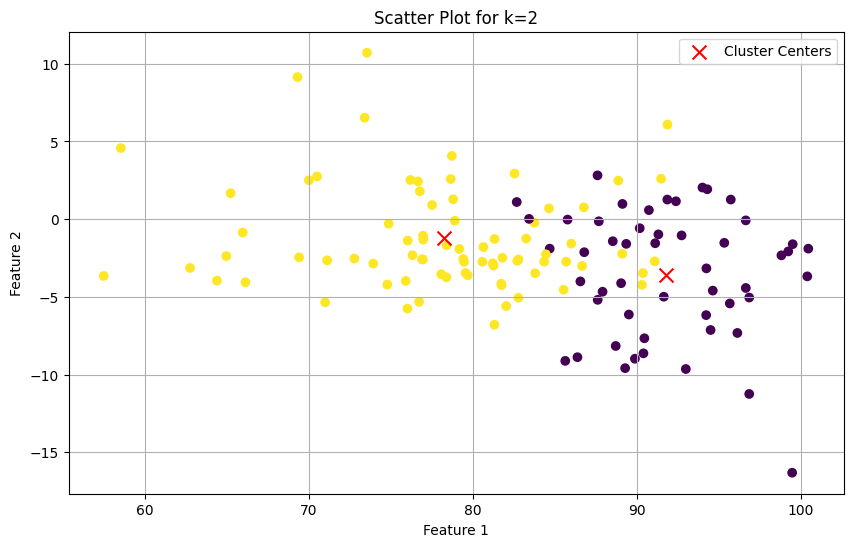

In [29]:
import matplotlib.pyplot as plt

mean = np.array(mean)
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignment, cmap='viridis')
plt.scatter(mean[:, 0], mean[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('Scatter Plot for k=2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()